In [83]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
%matplotlib inline

In [19]:
irisBunch = datasets.load_iris()
iris = pd.DataFrame(data=np.c_[irisBunch.data, irisBunch.target], columns=irisBunch.feature_names + ['species'])
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [44]:
trainX, testX, trainY, testY = train_test_split(irisBunch.data, irisBunch.target)

In [20]:
print(testX.shape)
print(trainX.shape)

(38, 4)
(112, 4)


In [22]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [32]:
pw = trainX[:, 2:3] # Petal Width
pl = trainX[:, 3:4] # Petal Length
trainLr = LinearRegression().fit(pw, pl)

In [43]:
print(trainLr.coef_)
print(trainLr.intercept_)

[[ 0.42141149]]
[-0.38192021]


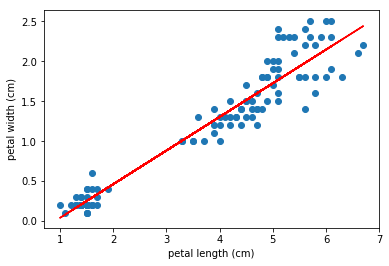

In [51]:
reg = trainLr.predict(pw)
plt.scatter(pw, pl)
plt.plot(pw, reg, color='red')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [71]:
abs_dev = abs(reg - pl)
abs_dev.sort()
pd.DataFrame(abs_dev).head()

,0
0,0.050197
1,0.072290
2,0.050197
3,0.093020
4,0.274863


In [81]:
km = KMeans(n_clusters=3).fit(irisBunch.data)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [73]:
irisBunch.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [82]:
accuracy_score(irisBunch.target, km.labels_)

0.44

In [86]:
knn = KNeighborsClassifier(n_neighbors=1).fit(trainX, trainY)
pred = knn.predict(testX)
accuracy_score(testY, pred)

0.89473684210526316